

# **Importing and loading author.csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("author.csv", index_col=None)
data.shape

(38925, 3)

# **Analyzing and cleaning the data**

In [ ]:
data.head()

,Author ID,Author Name,Author URL
0,39481716,m. corry,https://www.semanticscholar.org/author/39481716
1,1400383433,catalina amuedo-dorantes,https://www.semanticscholar.org/author/1400383433
2,4059419,cynthia bansak,https://www.semanticscholar.org/author/4059419
3,40392273,susan pozo,https://www.semanticscholar.org/author/40392273
4,47693041,g. myrdal,https://www.semanticscholar.org/author/47693041


In [ ]:
print(data.dtypes)

Author ID      object
Author Name    object
Author URL     object
dtype: object


In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

Author ID       0
Author Name     0
Author URL     72
dtype: int64


In [ ]:
row_at_author2 = data[data['Author ID'] == 'author2']
print(row_at_author2)


     Author ID Author Name Author URL
4893   author2      s gold        NaN


In [ ]:
# Remove rows where 'Author URL' is <NA> or NaN
data_cleaned = data[data['Author URL'].notna()]

# Check for missing values again
missing_values = data_cleaned.isnull().sum()
print(missing_values)


Author ID      0
Author Name    0
Author URL     0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = data_cleaned.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [ ]:
unique_authors = sorted(data_cleaned['Author ID'].unique())
print("Unique Authors:", len(unique_authors))
# for authors in unique_authors:
#   print(authors)

unique_names = sorted(data_cleaned['Author Name'].unique())
print("\nUnique Author names:", len(unique_names))

unique_url = sorted(data_cleaned['Author URL'].unique())
print("\nUnique URL:", len(unique_url))

Unique Authors: 38853

Unique Author names: 35497

Unique URL: 38853


In [ ]:
# Check which values are non-numeric
non_numeric_ids = data_cleaned[~data_cleaned['Author ID'].str.isnumeric()]
print(non_numeric_ids)


Empty DataFrame
Columns: [Author ID, Author Name, Author URL]
Index: []


In [ ]:
unique_authors = sorted(data_cleaned['Author ID'].unique())
print("Unique Authors:", len(unique_authors))
# for authors in unique_authors:
#   print(authors)

unique_names = sorted(data_cleaned['Author Name'].unique())
print("\nUnique Author names:", len(unique_names))

unique_url = sorted(data_cleaned['Author URL'].unique())
print("\nUnique URL:", len(unique_url))

Unique Authors: 38853

Unique Author names: 35497

Unique URL: 38853


In [ ]:
data_cleaned.describe()

,Author ID,Author Name,Author URL
count,38853,38853,38853
unique,38853,35497,38853
top,90365669,j. lee,https://www.semanticscholar.org/author/90365669
freq,1,26,1


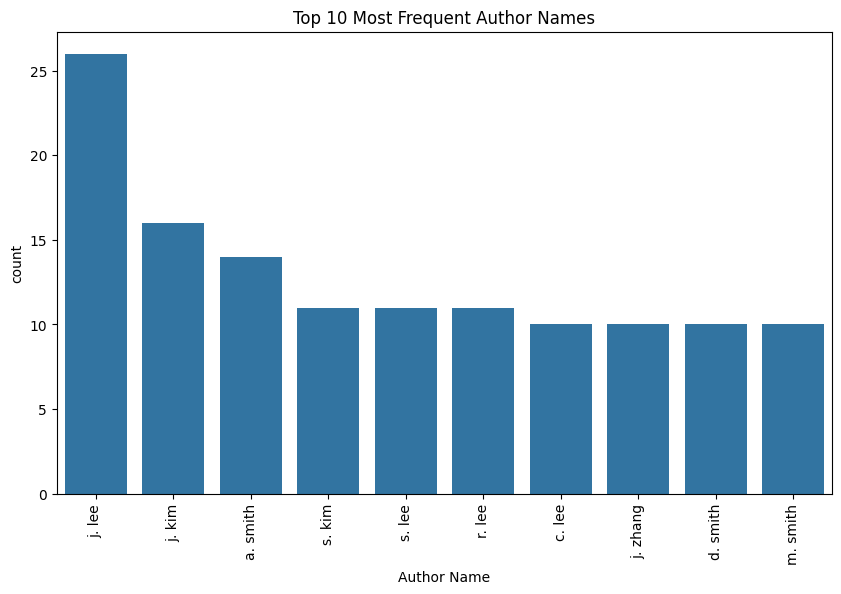

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Author Name', order=data['Author Name'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Frequent Author Names')
plt.xticks(rotation=90)
plt.show()


In [ ]:
data_cleaned.to_csv('data_cleaned.csv', index=False)
from google.colab import files
files.download('data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Importing and Loading paper.csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("paper.csv", index_col=None)
data.shape

<ipython-input-102-3c534b62bbc2>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("paper.csv", index_col=None)


(693624, 9)

# **Cleaning the data**

In [ ]:
data.head()

,Paper ID,Paper DOI,Paper Title,Paper Year,Paper URL,Paper Citation Count,Fields of Study,Journal Volume,Journal Date
0,86890c2cc83b19d8a2ce7dbe7230e14ea68dbee7,10.1080/1070289x.2017.1304725,corrigendum,NaN,https://www.semanticscholar.org/paper/86890c2c...,0.0,Medicine,25,2018-11-02
1,43f7a8ee7ecabfe5ad85dfd17f8d9a0e86ea083a,10.1177/0197918320920192,refugee admissions and public safety: are refu...,NaN,https://www.semanticscholar.org/paper/43f7a8ee...,0.0,Political Science,NaN,2020-01-01
2,paper1,NaN,trump orders mexican border wall to be built a...,NaN,NaN,NaN,NaN,NaN,NaN
3,paper2,NaN,trump bars refugees and citizens of 7 muslim c...,NaN,NaN,NaN,NaN,NaN,NaN
4,paper3,NaN,7 targeted countries react to trump's ban on i...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna(subset=['Paper DOI'])

In [ ]:
data.head()

,Paper ID,Paper DOI,Paper Title,Paper Year,Paper URL,Paper Citation Count,Fields of Study,Journal Volume,Journal Date
0,86890c2cc83b19d8a2ce7dbe7230e14ea68dbee7,10.1080/1070289x.2017.1304725,corrigendum,NaN,https://www.semanticscholar.org/paper/86890c2c...,0.0,Medicine,25,2018-11-02
1,43f7a8ee7ecabfe5ad85dfd17f8d9a0e86ea083a,10.1177/0197918320920192,refugee admissions and public safety: are refu...,NaN,https://www.semanticscholar.org/paper/43f7a8ee...,0.0,Political Science,NaN,2020-01-01
5,0b080d5b56bab6e8ea7049352b60dae260774a10,10.1177/030639686200400101,an american dilemma,1944.0,https://www.semanticscholar.org/paper/0b080d5b...,3.0,Sociology,4,1962-01-01
6,65c3428a169981aedfd8578e940c0963cab4115e,10.1111/j.1468-2435.1965.tb00735.x,"the world population conference, 1954",1955.0,https://www.semanticscholar.org/paper/65c3428a...,0.0,Computer Science,3,1965-01-01
7,9e4e8c2dfa0e2889cee72a994a9136ab8af10d13,10.1177/030639685900100207,some greek stereotypes of other peoples,1959.0,https://www.semanticscholar.org/paper/9e4e8c2d...,0.0,History,1,1959-01-01


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Paper ID                     0
Paper DOI                    0
Paper Title                  0
Paper Year                  65
Paper URL                   14
Paper Citation Count    289554
Fields of Study         290390
Journal Volume          290703
Journal Date            289554
dtype: int64


In [ ]:
duplicate_rows = data_cleaned.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [ ]:
# Print number of unique values in each column
for col in data.columns:
    print(f"Number of unique values in column '{col}': {data[col].nunique()}")


Number of unique values in column 'Paper ID': 321991
Number of unique values in column 'Paper DOI': 321207
Number of unique values in column 'Paper Title': 317365
Number of unique values in column 'Paper Year': 205
Number of unique values in column 'Paper URL': 321977
Number of unique values in column 'Paper Citation Count': 354
Number of unique values in column 'Fields of Study': 133
Number of unique values in column 'Journal Volume': 129
Number of unique values in column 'Journal Date': 973


In [ ]:
for col in data.columns:
    duplicates = data[data.duplicated(subset=[col], keep=False)]
    if not duplicates.empty:
        print(f"Duplicates in column '{col}':")
        print(duplicates[col].value_counts())
        print("---")
    else:
        print(f"No duplicates found in column '{col}'")
        print("---")

No duplicates found in column 'Paper ID'
---
Duplicates in column 'Paper DOI':
Paper DOI
10.1111/j.0042-7092.2007.00700.x    51
10.4314/gmj.v46i2                    8
10.1080/1361332052000341006          7
10.13039/501100000780                5
10.5007/%x                           5
                                    ..
10.1353/dem.2001.0028                2
10.1177/1468796807084019             2
10.1080/0961452052000321613          2
10.1023/a:1006563032706              2
10.7748/nr.12.1.84.s4                2
Name: count, Length: 697, dtype: int64
---
Duplicates in column 'Paper Title':
Paper Title
editorial                                                                   103
introduction                                                                 75
corrigendum                                                                  36
erratum                                                                      30
uk commentary                                                          

In [ ]:
data.describe()

,Paper Year,Paper Citation Count
count,321926.000000,32437.000000
mean,2000.404245,16.801215
std,15.517185,44.737512
min,1600.000000,0.000000
25%,1994.000000,1.000000
50%,2004.000000,6.000000
75%,2011.000000,17.000000
max,2020.000000,2216.000000


In [ ]:
data.to_csv('data.csv', index=False)
from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Importing and Loading journal.csv**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("journal.csv", index_col=None)
data.shape

(165, 2)

# **Cleaning the data**

In [2]:
data.head()

,Journal Name,Journal Publisher
0,Journal of Immigrant and Refugee Studies,Routledgeinfo@tandf.co.uk
1,Identities,Taylor and Francis Ltd.
2,Ethnic and Racial Studies,Routledge
3,Journal of Diversity in Higher Education,NaN
4,Patterns of prejudice,NaN


In [3]:
missing_values = data.isnull().sum()
print(missing_values)

Journal Name          0
Journal Publisher    45
dtype: int64


In [5]:
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [6]:
# Print number of unique values in each column
for col in data.columns:
    print(f"Number of unique values in column '{col}': {data[col].nunique()}")


Number of unique values in column 'Journal Name': 51
Number of unique values in column 'Journal Publisher': 72


In [8]:
# Fill null values in 'Journal Publisher' with '-'
data['Journal Publisher'] = data['Journal Publisher'].fillna('-')

In [9]:
data.describe()

,Journal Name,Journal Publisher
count,165,165
unique,51,73
top,Journal of International Migration and Integra...,-
freq,8,45


In [10]:
data.to_csv('journal_cleaned.csv', index=False)
from google.colab import files
files.download('journal_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Importing and Loading paper_journal.csv**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("paper_journal.csv", index_col=None)
data.shape

(32647, 3)

# **Cleaning the data**

In [18]:
data.head()

,Paper ID,Journal Name,Journal Publisher
0,4301e6749a626fe36567e53f49fa5a247ba28dd7,Journal of Ethnic and Migration Studies,Routledgeinfo@tandf.co.uk
1,2c84d9e3c279717276f85352970a12b2c318fa6e,Journal of Black Studies,NaN
2,e80d8babbb18afbdc4ac3ccd5d19b578d790a94e,Patterns of Prejudice,NaN
3,2540253d3503a06adac372dda2883d8cd7731be6,"International Journal of Migration, Health and...",NaN
4,66e1fc7f5c8cef3b094d8539d308a8724ea72291,Mobilities,Routledgeinfo@tandf.co.uk


In [19]:
missing_values = data.isnull().sum()
print(missing_values)

Paper ID                 0
Journal Name             0
Journal Publisher    17739
dtype: int64


In [20]:
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [21]:
# Print number of unique values in each column
for col in data.columns:
    print(f"Number of unique values in column '{col}': {data[col].nunique()}")


Number of unique values in column 'Paper ID': 32624
Number of unique values in column 'Journal Name': 51
Number of unique values in column 'Journal Publisher': 72


In [22]:
# Fill null values in 'Journal Publisher' with '-'
data['Journal Publisher'] = data['Journal Publisher'].fillna('-')

In [23]:
data.describe()

,Paper ID,Journal Name,Journal Publisher
count,32647,32647,32647
unique,32624,51,73
top,428a50109a69c948ed9fd6eb6517a7c24ade9235,Journal of Ethnic and Migration Studies,-
freq,2,3431,17739


In [24]:
data.to_csv('paper_journal_cleaned.csv', index=False)
from google.colab import files
files.download('paper_journal_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Importing and Loading topic.csv**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("topic.csv", index_col=None)
data.shape

(6489, 3)

# **Cleaning the data**

In [12]:
data.head()

,Topic ID,Topic Name,Topic URL
0,365920,corrigendum,https://www.semanticscholar.org/topic/365920
1,2460,Volume,https://www.semanticscholar.org/topic/2460
2,4169797,latin language,https://www.semanticscholar.org/topic/4169797
3,639351,CONQUEST,https://www.semanticscholar.org/topic/639351
4,20266,Reading (activity),https://www.semanticscholar.org/topic/20266


In [13]:
missing_values = data.isnull().sum()
print(missing_values)

Topic ID      0
Topic Name    0
Topic URL     0
dtype: int64


In [25]:
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [15]:
# Print number of unique values in each column
for col in data.columns:
    print(f"Number of unique values in column '{col}': {data[col].nunique()}")


Number of unique values in column 'Topic ID': 6489
Number of unique values in column 'Topic Name': 6470
Number of unique values in column 'Topic URL': 6489


In [16]:
data.describe()

,Topic ID
count,6.489000e+03
mean,7.787444e+05
std,1.624479e+06
min,2.000000e+00
25%,1.615600e+04
50%,1.026200e+05
75%,6.356740e+05
max,1.232875e+07


In [ ]:
data.to_csv('topic_cleaned.csv', index=False)
from google.colab import files
files.download('topic_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>